In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | aras
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | yazd
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | angoram
Processing Record 14 of Set 1 | sao joao do paraiso
Processing Record 15 of Set 1 | taksimo
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | tiarei
Processing Record 20 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22

Processing Record 37 of Set 4 | necochea
Processing Record 38 of Set 4 | pucara
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | dandong
Processing Record 41 of Set 4 | khartoum
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | sadiqabad
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | tsienyane
City not found. Skipping...
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | raudeberg
Processing Record 50 of Set 4 | san pedro
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | gravdal
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | acari
Processing Record 5 of Set 5 | nizwa
Processing Record 6 of Set 5 | lunglei
Processing Record 7 of Set 5 | kamaishi
Processing Record 8 of Set 5 | greymouth
Processing Record 9 of Set 5 | faya
Processing Record 10 of Set 5 | sasky

Processing Record 28 of Set 8 | saint george
Processing Record 29 of Set 8 | monte carmelo
Processing Record 30 of Set 8 | nchelenge
Processing Record 31 of Set 8 | marawi
Processing Record 32 of Set 8 | korem
Processing Record 33 of Set 8 | kathu
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | samarai
Processing Record 37 of Set 8 | timra
Processing Record 38 of Set 8 | coihaique
Processing Record 39 of Set 8 | mandali
Processing Record 40 of Set 8 | koshurnikovo
Processing Record 41 of Set 8 | longlac
City not found. Skipping...
Processing Record 42 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 8 | ca mau
Processing Record 44 of Set 8 | kesinga
Processing Record 45 of Set 8 | omsukchan
Processing Record 46 of Set 8 | pahrump
Processing Record 47 of Set 8 | gizo
Processing Record 48 of Set 8 | rincon
Processing Record 49 of Set 8 | sobolevo
Processing Record 50 of Set 8 | kysyl-syr
P

Processing Record 13 of Set 12 | severomuysk
Processing Record 14 of Set 12 | soria
Processing Record 15 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 16 of Set 12 | ruteng
Processing Record 17 of Set 12 | rio gallegos
Processing Record 18 of Set 12 | mackenzie
Processing Record 19 of Set 12 | george town
Processing Record 20 of Set 12 | skala fourkas
Processing Record 21 of Set 12 | rafaela
Processing Record 22 of Set 12 | billund
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | jardim
Processing Record 25 of Set 12 | yinchuan
Processing Record 26 of Set 12 | rawson
Processing Record 27 of Set 12 | gisborne
Processing Record 28 of Set 12 | okandja
City not found. Skipping...
Processing Record 29 of Set 12 | independence
Processing Record 30 of Set 12 | sungaipenuh
Processing Record 31 of Set 12 | butterworth
Processing Record 32 of Set 12 | monatele
City not found. Skipping...
Processing Record 33 of Set 12 | yerofey pavlovich
Proces

In [20]:
len(city_data)

565

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.63,72,78,6.98,PF,2022-01-18 02:56:37
1,Lompoc,34.6391,-120.4579,58.57,88,100,0.00,US,2022-01-18 02:54:44
2,Henties Bay,-22.1160,14.2845,68.86,90,91,3.38,NA,2022-01-18 02:56:37
3,Hobart,-42.8794,147.3294,69.03,61,75,1.99,AU,2022-01-18 02:52:45
4,Aras,42.5617,-2.3560,27.72,93,0,3.44,ES,2022-01-18 02:56:38
5,Bredasdorp,-34.5322,20.0403,63.72,88,74,3.44,ZA,2022-01-18 02:53:38
6,Yellowknife,62.4560,-114.3525,-29.58,75,0,9.22,CA,2022-01-18 02:56:38
7,Georgetown,5.4112,100.3354,85.93,61,20,1.01,MY,2022-01-18 02:55:00
8,Yazd,31.8972,54.3675,51.91,35,40,2.30,IR,2022-01-18 02:56:39
9,Cidreira,-30.1811,-50.2056,75.06,90,39,7.16,BR,2022-01-18 02:55:58


In [22]:
# Reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-01-18 02:56:37,-23.1203,-134.9692,77.63,72,78,6.98
1,Lompoc,US,2022-01-18 02:54:44,34.6391,-120.4579,58.57,88,100,0.00
2,Henties Bay,NA,2022-01-18 02:56:37,-22.1160,14.2845,68.86,90,91,3.38
3,Hobart,AU,2022-01-18 02:52:45,-42.8794,147.3294,69.03,61,75,1.99
4,Aras,ES,2022-01-18 02:56:38,42.5617,-2.3560,27.72,93,0,3.44
5,Bredasdorp,ZA,2022-01-18 02:53:38,-34.5322,20.0403,63.72,88,74,3.44
6,Yellowknife,CA,2022-01-18 02:56:38,62.4560,-114.3525,-29.58,75,0,9.22
7,Georgetown,MY,2022-01-18 02:55:00,5.4112,100.3354,85.93,61,20,1.01
8,Yazd,IR,2022-01-18 02:56:39,31.8972,54.3675,51.91,35,40,2.30
9,Cidreira,BR,2022-01-18 02:55:58,-30.1811,-50.2056,75.06,90,39,7.16


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

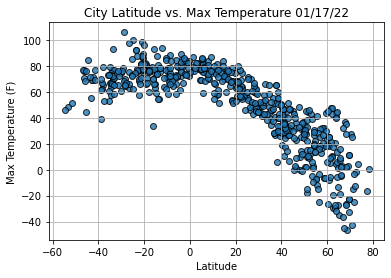

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

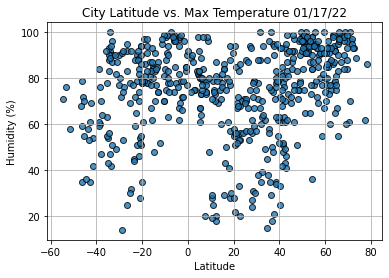

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

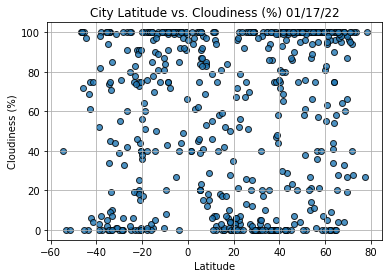

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

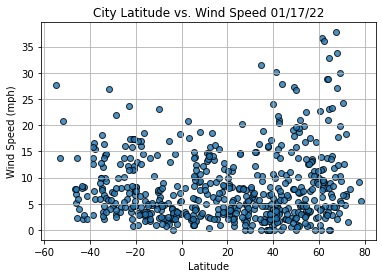

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()